In [1]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255.)
dataset=datagen.flow_from_directory('PetImages/', class_mode='binary',batch_size=35027,shuffle=False,target_size=(256,256))


Found 35022 images belonging to 2 classes.


In [2]:
X,Y=dataset.next()

C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\PIL\TiffIma

(35022, 256, 256, 3)


1.0

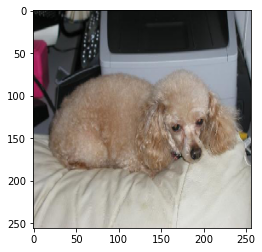

In [33]:
print(X.shape)
import matplotlib.pyplot as plt
plt.imshow(X[20000])
Y[20000]

In [4]:
num_labels =2
batch_size = 32
nb_epoch = 5

In [5]:
from keras.layers import Conv2D, GlobalMaxPooling1D, Embedding,MaxPool2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import metrics, regularizers
from keras.optimizers import Adam
model = Sequential()
# convolutional layer
model.add(Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Dropout(0.3))
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 3)       84        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 3)       0         
_________________________________________________________________
dropout (Dropout)            (None, 254, 254, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 193548)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               19354900  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 19,355,085
Trainable params: 19,355,085
Non-trainable params: 0
____________________________________________

In [6]:
history = model.fit(X,Y,
                    validation_split=0.15,
                    batch_size = 32,
                    epochs = nb_epoch,
                    verbose = True)

Epoch 1/5
931/931 [==============================] - 286s 306ms/step - loss: 2.2898 - accuracy: 0.5838 - val_loss: 0.8389 - val_accuracy: 0.3736
Epoch 2/5
931/931 [==============================] - 286s 307ms/step - loss: 0.5562 - accuracy: 0.7224 - val_loss: 0.6030 - val_accuracy: 0.5984
Epoch 3/5
931/931 [==============================] - 285s 306ms/step - loss: 0.4482 - accuracy: 0.7953 - val_loss: 0.4912 - val_accuracy: 0.7301
Epoch 4/5
931/931 [==============================] - 263s 283ms/step - loss: 0.3482 - accuracy: 0.8526 - val_loss: 0.4792 - val_accuracy: 0.7419
Epoch 5/5
931/931 [==============================] - 261s 280ms/step - loss: 0.2727 - accuracy: 0.8886 - val_loss: 0.2718 - val_accuracy: 0.8797


In [7]:
score = model.evaluate(X,Y, batch_size = batch_size, verbose = True)
 
print('\nTest categorical_crossentropy:', score[0])
print('Categorical accuracy:', score[1])


1095/1095 [==============================] - 111s 100ms/step - loss: 0.1773 - accuracy: 0.9412

Test categorical_crossentropy: 0.17730115354061127
Categorical accuracy: 0.9411798119544983


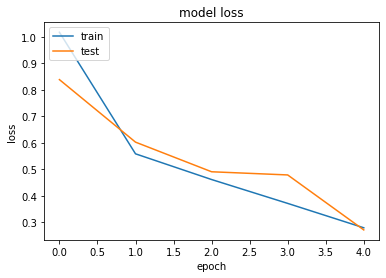

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

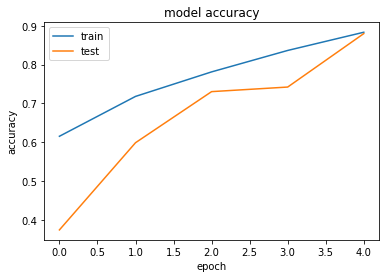

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()